In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [9]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
ii = 0
result = np.zeros((12,175,200))
result2 = np.zeros((12,175,200))
Final  = np.zeros((310))

In [10]:
for yy in years:
    i = 0
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.UVEL.nc')
        plotvar = data.variables['UVEL'][0,0,426:603,1300:1500]
        plotvar = plotvar[:,:]
        result[i] = plotvar
        data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.VVEL.nc')
        plotvar2 = data2.variables['VVEL'][0,0,426:603,1300:1500]
        plotvar2 = plotvar2[:,:]
        result2[i] = plotvar2
        i = i + 1
    mean1 = np.nanmean(result,axis=0)
    mean2 = np.nanmean(result2,axis=0)
    i = 0
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.UVEL.nc')
        plotvar = data.variables['UVEL'][0,0,426:603,1300:1500]
        plotvar = (plotvar[:,:] - mean1)**2
        result[i] = plotvar
        data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.VVEL.nc')
        plotvar2 = data2.variables['VVEL'][0,0,426:603,1300:1500]
        plotvar2 = (plotvar2[:,:] -mean2)**2
        result2[i] = plotvar2
        i = i + 1
    re3 = np.nanmean(result,axis=0)
    re4 = np.nanmean(result2,axis=0)
    TKE = 0.5*(re3 +re4)
    Final[ii] = TKE.sum()
    ii = ii +1

In [17]:
ww2 = np.convolve(Final, np.ones((5,))/5, mode='valid')

In [21]:
mean = np.mean(ww2)
std = np.std(ww2)
SST = ww2 - mean

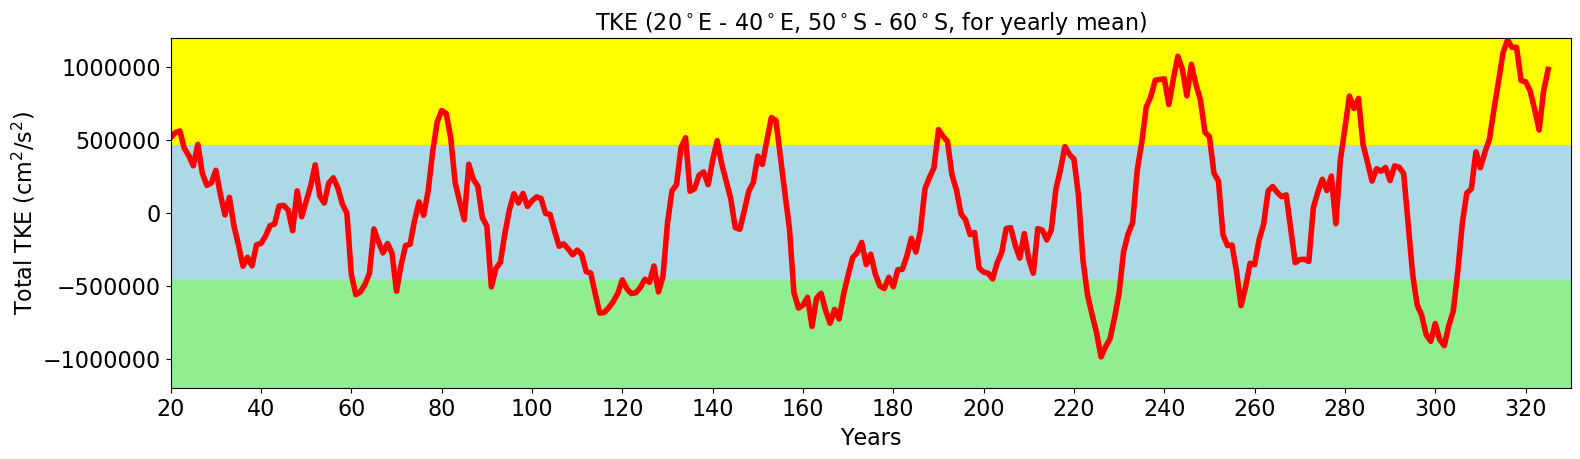

In [38]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(SST,'red',linewidth=4)
plt.axhspan(std,1200000,facecolor='yellow', alpha=1)
plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
plt.axhspan(-1200000,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,310,20), ['20', '40', '60', '80','100','120','140','160',\
                            '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Total TKE (cm$^{2}$/s$^{2}$)',**my_font)
plt.axis("tight")
ax0.set(ylim=(-1200000, 1200000),xlim=(0, 310))
ax0.set_title('TKE (20$^\circ$E - 40$^\circ$E, 50$^\circ$S - 60$^\circ$S, for yearly mean)',**my_font)
################################################
#ax2 = ax0.twinx() 
#ax2.plot(WDWF,'blue',linewidth=4)


###################################
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
#plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('WDW($^\circ$C)',**my_font)
#ax2.set(ylim=(-0.3, 0.3),xlim=(0, 3720))
########################################
plt.savefig("TKE.png",bbox_inches='tight',dpi=fig.dpi)

In [40]:
data1 = np.loadtxt("WDW21-61.out")
data2 = np.loadtxt("WDW61-111.out")
data3 = np.loadtxt("WDW111-161.out")
data4 = np.loadtxt("WDW161-211.out")
data5 = np.loadtxt("WDW211-261.out")
data6 = np.loadtxt("WDW261-331.out")
result2 = np.zeros(3720)
result2[0:480] =data1
result2[480:1080] =data2
result2[1080:1680] =data3
result2[1680:2280] =data4
result2[2280:2880] =data5
result2[2880:3720] =data6

In [41]:
WDW = np.convolve(result2, np.ones((60,))/60, mode='valid')
meanWDW = np.mean(WDW)
WDWF = WDW - meanWDW
stdW = np.std(WDW)

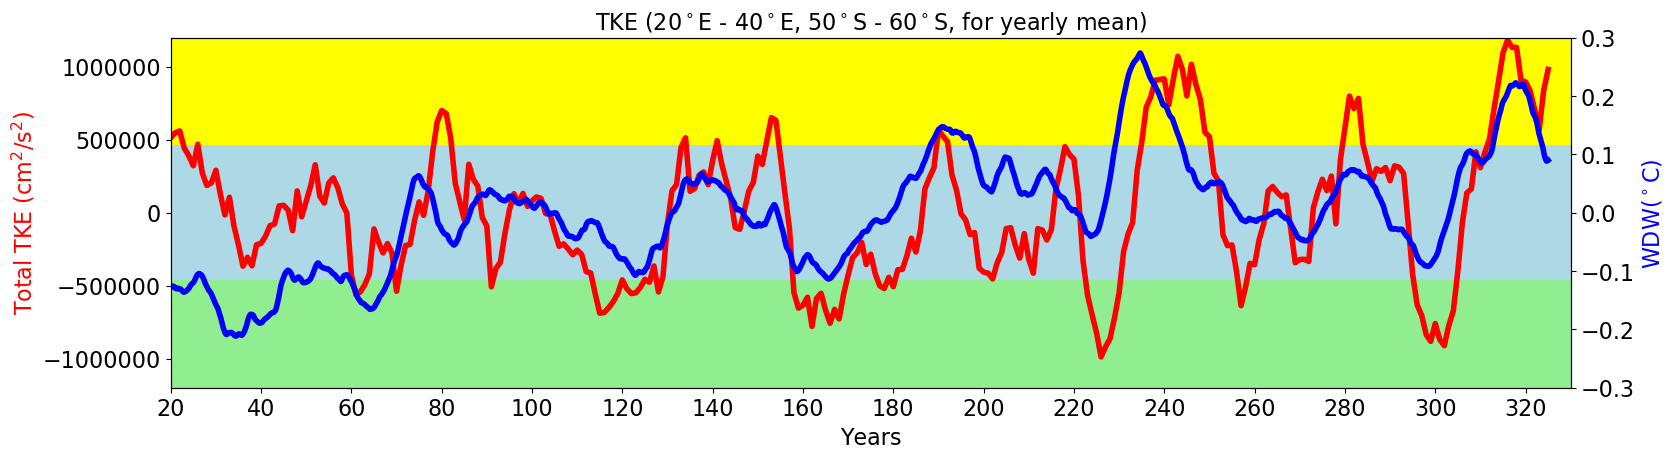

In [49]:
my_font = {'fontname':'Cambria', 'size':'16'}
t = np.arange(0,3672,12)
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(t,SST,'red',linewidth=4)
plt.axhspan(std,1200000,facecolor='yellow', alpha=1)
plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
plt.axhspan(-1200000,-std,facecolor='lightgreen', alpha=1)
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160',\
                            '180','200','220', '240', '260','280','300','320'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Total TKE (cm$^{2}$/s$^{2}$)',color = 'r',**my_font)
plt.axis("tight")
ax0.set(ylim=(-1200000, 1200000),xlim=(0, 6720))
ax0.set_title('TKE (20$^\circ$E - 40$^\circ$E, 50$^\circ$S - 60$^\circ$S, for yearly mean)',**my_font)
################################################
ax2 = ax0.twinx() 
ax2.plot(WDWF,'blue',linewidth=4)


###################################
#plt.hlines(0, 0, 3720, colors = "g",linestyles = "dashed")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('WDW($^\circ$C)',color = 'blue',**my_font)
ax2.set(ylim=(-0.3, 0.3),xlim=(0, 3720))
########################################
plt.savefig("TKE.png",bbox_inches='tight',dpi=fig.dpi)